# Task - 1
The scope of task-1 is to analyze chip for a Qunatium client. They want to gain insights on the sales data.

In [ ]:
#import initial libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import transaction data file
from google.colab import files
data=files.upload()

Saving QVI_transaction_data.xlsx to QVI_transaction_data.xlsx


In [ ]:
#import purchase behaviour file
from google.colab import files
datas=files.upload()

Saving QVI_purchase_behaviour.csv to QVI_purchase_behaviour.csv


# Creating and interpreting high level summaries of the data

In [ ]:
#read ths transaction data file using a variable chips
chips=pd.read_excel(data['QVI_transaction_data.xlsx'])

In [ ]:
#exploring the dataset
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
#exploring the column types
chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
#read the purchase behaviour data file using a variable chips_beh
chips_beh=pd.read_csv('QVI_purchase_behaviour.csv')

In [ ]:
chips_beh

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [ ]:
chips_beh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
chips_beh['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [ ]:
chips_beh['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
chips["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [ ]:
#seperating chips weight
chips['WEIGHT']=chips['PROD_NAME'].str[-4:]
chips['WEIGHT']

0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264831    175g
264832    175g
264833    170g
264834    150g
264835    175g
Name: WEIGHT, Length: 264836, dtype: object

In [ ]:
#salt having weight is 135g
chips['WEIGHT'].value_counts()

175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
200g     4473
Salt     3257
250g     3169
210g     3167
210G     3105
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: WEIGHT, dtype: int64

In [ ]:
#correcting the data
chips['WEIGHT']=chips['WEIGHT'].replace({'Salt':'135g','210G':'210g','150G':'150g','175G':'175g'})

In [ ]:
chips['WEIGHT'].value_counts()

175g    66390
150g    43131
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
210g     6272
200g     4473
135g     3257
250g     3169
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
180g     1468
125g     1454
Name: WEIGHT, dtype: int64

In [ ]:
chips['PROD_NAME']=chips['PROD_NAME'].str.strip()

In [ ]:
#since "salsa" is not a chip
index_drop=chips[chips['PROD_NAME']=="Old belongs to 1 Paso Salsa"].index
chips=chips.drop(index_drop)

In [ ]:
chips[chips['PROD_NAME']=="Old belongs to 1 Paso Salsa"].count()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
WEIGHT            0
dtype: int64

In [ ]:
#for brand name
chips['BRAND']=chips['PROD_NAME'].str.split().str.get(0)
chips['BRAND'].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [ ]:
chips['DATE'].unique()

array([43390, 43599, 43605, 43329, 43330, 43604, 43601, 43332, 43602,
       43603, 43600, 43326, 43328, 43331, 43327, 43633, 43348, 43370,
       43523, 43543, 43632, 43429, 43414, 43533, 43405, 43537, 43561,
       43311, 43391, 43409, 43528, 43535, 43576, 43468, 43366, 43624,
       43313, 43448, 43587, 43474, 43566, 43529, 43369, 43554, 43519,
       43451, 43564, 43563, 43382, 43407, 43489, 43510, 43627, 43284,
       43299, 43309, 43552, 43593, 43611, 43526, 43578, 43584, 43357,
       43494, 43547, 43550, 43318, 43467, 43555, 43294, 43386, 43496,
       43504, 43520, 43583, 43321, 43446, 43568, 43643, 43646, 43287,
       43562, 43423, 43434, 43479, 43333, 43508, 43634, 43436, 43458,
       43463, 43579, 43620, 43622, 43345, 43361, 43482, 43617, 43625,
       43288, 43352, 43360, 43404, 43290, 43323, 43363, 43399, 43402,
       43551, 43556, 43365, 43367, 43439, 43518, 43539, 43639, 43292,
       43395, 43450, 43462, 43503, 43336, 43375, 43381, 43534, 43644,
       43295, 43509,

In [ ]:
chips_salesdate=chips.sort_values(by='DATE')
chips_salesdate['DATE'].unique()

array([43282, 43283, 43284, 43285, 43286, 43287, 43288, 43289, 43290,
       43291, 43292, 43293, 43294, 43295, 43296, 43297, 43298, 43299,
       43300, 43301, 43302, 43303, 43304, 43305, 43306, 43307, 43308,
       43309, 43310, 43311, 43312, 43313, 43314, 43315, 43316, 43317,
       43318, 43319, 43320, 43321, 43322, 43323, 43324, 43325, 43326,
       43327, 43328, 43329, 43330, 43331, 43332, 43333, 43334, 43335,
       43336, 43337, 43338, 43339, 43340, 43341, 43342, 43343, 43344,
       43345, 43346, 43347, 43348, 43349, 43350, 43351, 43352, 43353,
       43354, 43355, 43356, 43357, 43358, 43359, 43360, 43361, 43362,
       43363, 43364, 43365, 43366, 43367, 43368, 43369, 43370, 43371,
       43372, 43373, 43374, 43375, 43376, 43377, 43378, 43379, 43380,
       43381, 43382, 43383, 43384, 43385, 43386, 43387, 43388, 43389,
       43390, 43391, 43392, 43393, 43394, 43395, 43396, 43397, 43398,
       43399, 43400, 43401, 43402, 43403, 43404, 43405, 43406, 43407,
       43408, 43409,

In [ ]:
#rrd brand is red brand
#merging two
chips["BRAND"]=chips["BRAND"].replace({'RRD':'Red'})
chips["BRAND"].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Red           17779
Thins         14075
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [ ]:
chips["BRAND"]=chips["BRAND"].replace({'Dorito':'Doritos','Smith':'Smiths','Infzns':'Infuzions'})
chips["BRAND"].value_counts()

Kettle        41288
Smiths        31823
Doritos       28147
Pringles      25102
Red           17779
Infuzions     14201
Thins         14075
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Woolworths     4437
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [ ]:
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos


In [ ]:
chips.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
chips.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
WEIGHT            0
BRAND             0
dtype: int64

# Checking and removing for outliers

In [ ]:
chips[chips['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380g,Doritos
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380g,Doritos


In [ ]:
chips=chips.drop([0,1])
chips=chips.reset_index(drop=True)

In [ ]:
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND
0,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths
1,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths
2,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle
3,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300g,Old
4,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330g,Smiths
...,...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos


In [ ]:
chips=pd.merge(chips,chips_beh,on='LYLTY_CARD_NBR',how='left')
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,LIFESTAGE_x,PREMIUM_CUSTOMER_x,LIFESTAGE_y,PREMIUM_CUSTOMER_y
0,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget,MIDAGE SINGLES/COUPLES,Budget
1,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget,MIDAGE SINGLES/COUPLES,Budget
2,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget,MIDAGE SINGLES/COUPLES,Budget
3,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300g,Old,MIDAGE SINGLES/COUPLES,Budget,MIDAGE SINGLES/COUPLES,Budget
4,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330g,Smiths,MIDAGE SINGLES/COUPLES,Budget,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium


<Axes: ylabel='TOT_SALES'>

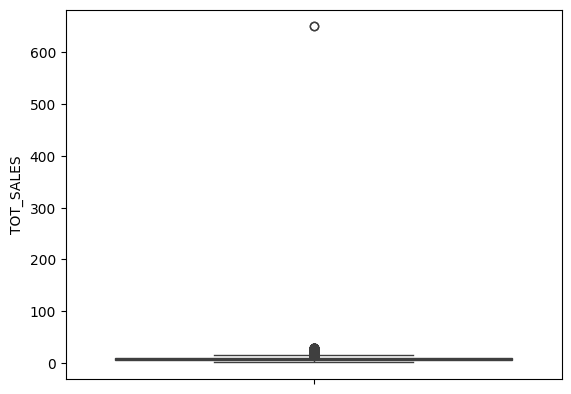

In [ ]:
sns.boxplot(chips.TOT_SALES)

<ipython-input-35-a25589c44840>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chips.TOT_SALES,kde=True)


<Axes: xlabel='TOT_SALES', ylabel='Density'>

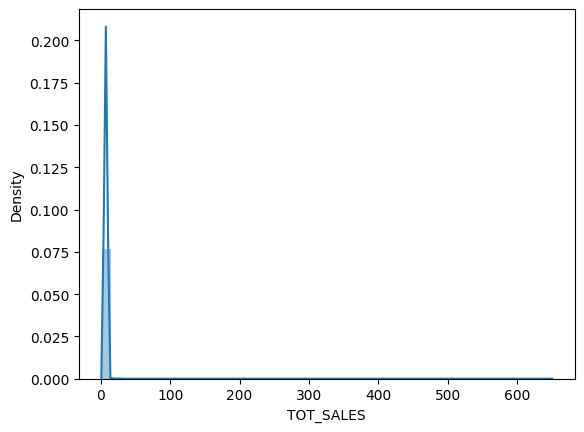

In [ ]:
sns.distplot(chips.TOT_SALES,kde=True)

In [ ]:
ndata=chips.select_dtypes(['float','int'])

In [ ]:
ndata

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43605,1,1343,383,61,2,2.9
1,43329,2,2373,974,69,5,15.0
2,43330,2,2426,1038,108,3,13.8
3,43604,4,4074,2982,57,1,5.1
4,43601,4,4149,3333,16,1,5.7
...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,2,10.8
264830,43325,272,272358,270154,74,1,4.4
264831,43410,272,272379,270187,51,2,8.8
264832,43461,272,272379,270188,42,2,7.8


In [ ]:
fil=ndata[ndata['TOT_SALES']<8.00]

<ipython-input-39-3e087f3fc1c0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fil.TOT_SALES,kde=True)


<Axes: xlabel='TOT_SALES', ylabel='Density'>

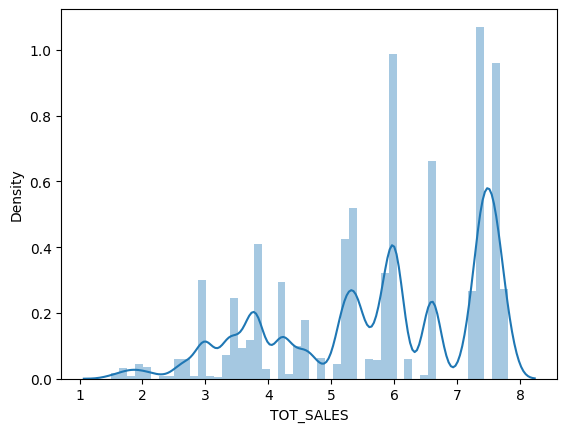

In [ ]:
sns.distplot(fil.TOT_SALES,kde=True)

<ipython-input-40-208400af1635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fil.TOT_SALES,kde=False)


<Axes: xlabel='TOT_SALES'>

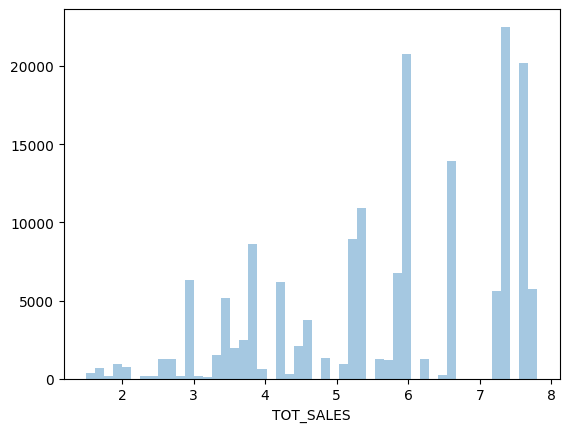

In [ ]:
sns.distplot(fil.TOT_SALES,kde=False)

<Axes: ylabel='TOT_SALES'>

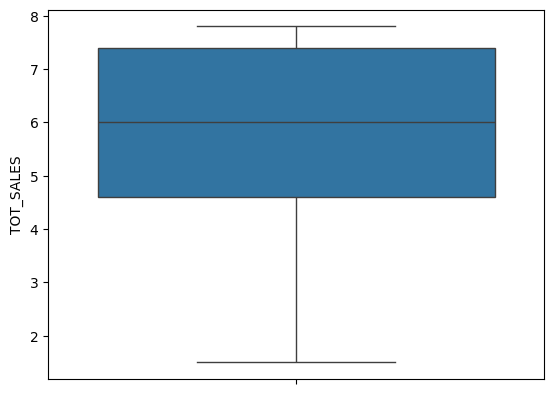

In [ ]:
sns.boxplot(fil.TOT_SALES)

Data set is ready

# Gathering some insights

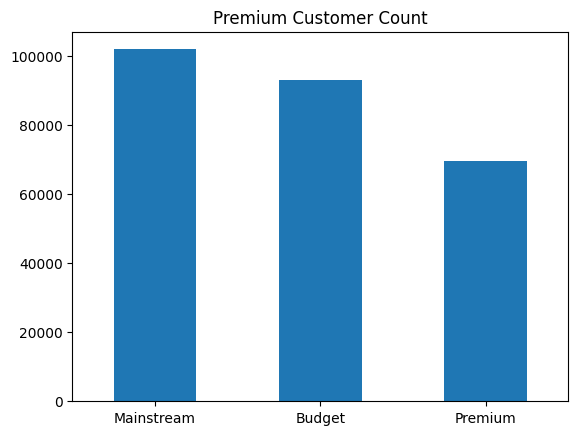

In [ ]:
#premium coustomers
pcvc=chips['PREMIUM_CUSTOMER_x'].value_counts()
pcvc.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('Premium Customer Count')
plt.show()

In [ ]:
#unique members in premium customer type
unique=chips.drop_duplicates(subset='LYLTY_CARD_NBR')
unique['PREMIUM_CUSTOMER_x'].value_counts()

Mainstream    29245
Budget        24470
Premium       18921
Name: PREMIUM_CUSTOMER_x, dtype: int64

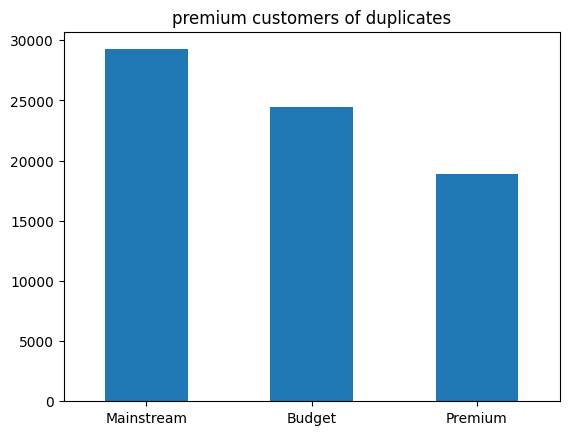

In [ ]:
unpc=unique['PREMIUM_CUSTOMER_x'].value_counts()
unpc.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('premium customers of duplicates')
plt.show()

In [ ]:
#lifestage of customers
unique['LIFESTAGE_x'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14440
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE_x, dtype: int64

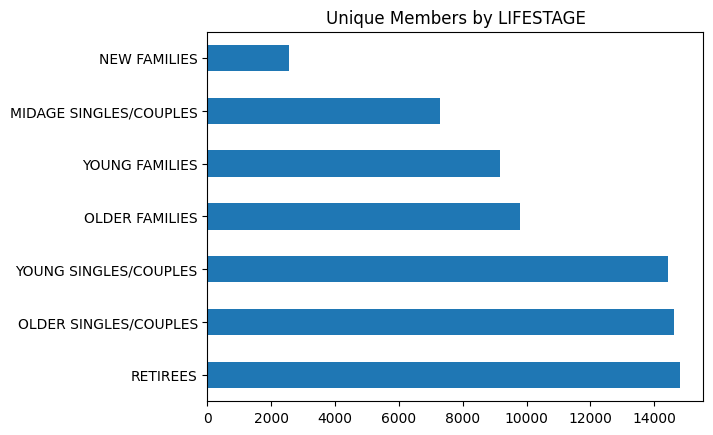

In [ ]:
unls=unique['LIFESTAGE_x'].value_counts()
unls.plot(kind='barh')
plt.xticks(rotation=360)
plt.title('Unique Members by LIFESTAGE')
plt.show()

In [ ]:
#gruping by brand
chips_br=chips.groupby('BRAND')

In [ ]:
#total sale for each brand
chips_salesbrand=chips_br['TOT_SALES'].sum()

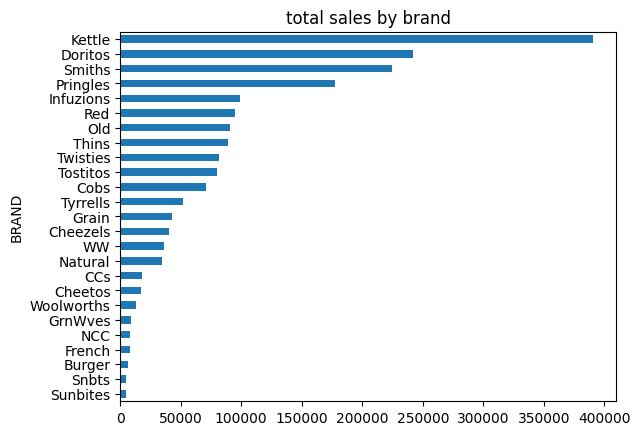

In [ ]:
chips_salesbrand.sort_values().plot(kind='barh')
plt.title('total sales by brand')
plt.show()

In [ ]:
chips_mbr=chips.groupby('LYLTY_CARD_NBR')
chips_salesmbr=chips_mbr['TOT_SALES'].sum()

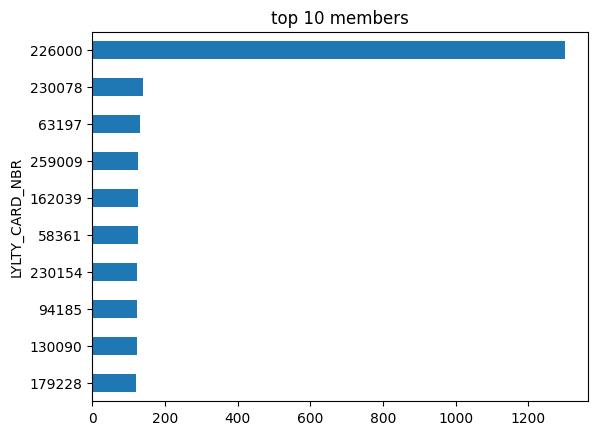

In [ ]:
chips_sorted=chips_salesmbr.sort_values()
chips_sorted.tail(10).plot(kind='barh')
plt.title('top 10 members')
plt.show()

In [ ]:
top_ten=[226000,230078,63197,259009,162039,58361,230154,94185,130090,179228]
top_tenmbr=chips[chips['LYLTY_CARD_NBR'].isin(top_ten)]
top_tengrp=top_tenmbr.groupby('LYLTY_CARD_NBR')
top_tengrp['LIFESTAGE_x'].value_counts()

LYLTY_CARD_NBR  LIFESTAGE_x          
58361           YOUNG FAMILIES           14
63197           OLDER FAMILIES           15
94185           YOUNG FAMILIES           16
130090          YOUNG FAMILIES           14
162039          OLDER FAMILIES           18
179228          YOUNG FAMILIES           16
226000          OLDER FAMILIES            2
230078          OLDER FAMILIES           17
230154          OLDER FAMILIES           14
259009          OLDER SINGLES/COUPLES    15
Name: LIFESTAGE_x, dtype: int64

In [ ]:
top_tengrp['PREMIUM_CUSTOMER_x'].value_counts()

LYLTY_CARD_NBR  PREMIUM_CUSTOMER_x
58361           Budget                14
63197           Budget                15
94185           Premium               16
130090          Budget                14
162039          Mainstream            18
179228          Budget                16
226000          Premium                2
230078          Budget                17
230154          Budget                14
259009          Mainstream            15
Name: PREMIUM_CUSTOMER_x, dtype: int64

In [ ]:
chips_sorted.describe()

count    72636.00000
mean        26.63146
std         20.81440
min          1.50000
25%          9.10000
50%         21.70000
75%         40.00000
max       1300.00000
Name: TOT_SALES, dtype: float64

In [ ]:
#grouping lifestage and finding total sales
chips_ls=chips.groupby('LIFESTAGE_x')
chips_ls_sales=chips_ls['TOT_SALES'].sum()

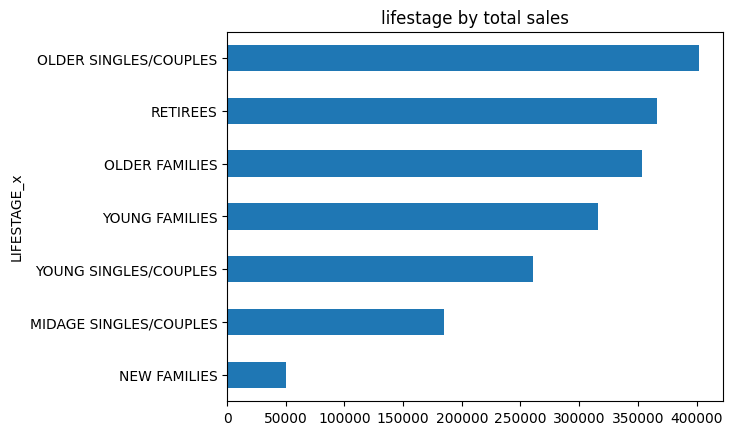

In [ ]:
chips_ls_sales.sort_values().plot(kind='barh')
plt.title('lifestage by total sales')
plt.show()

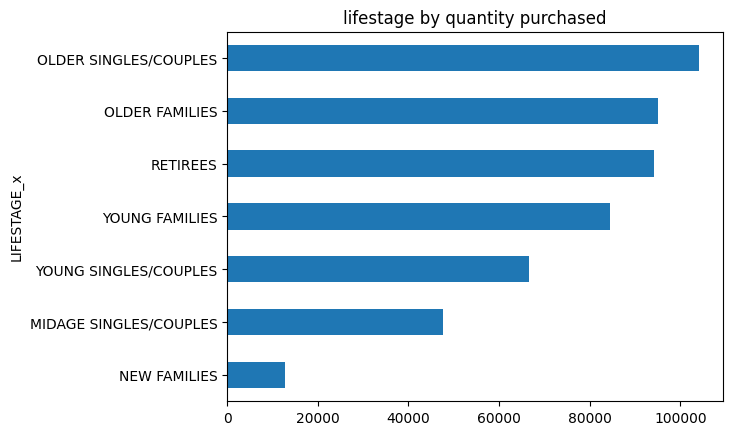

In [ ]:
chips_ls_qty=chips_ls['PROD_QTY'].sum()
chips_ls_qty.sort_values().plot(kind='barh')
plt.title('lifestage by quantity purchased')
plt.show()

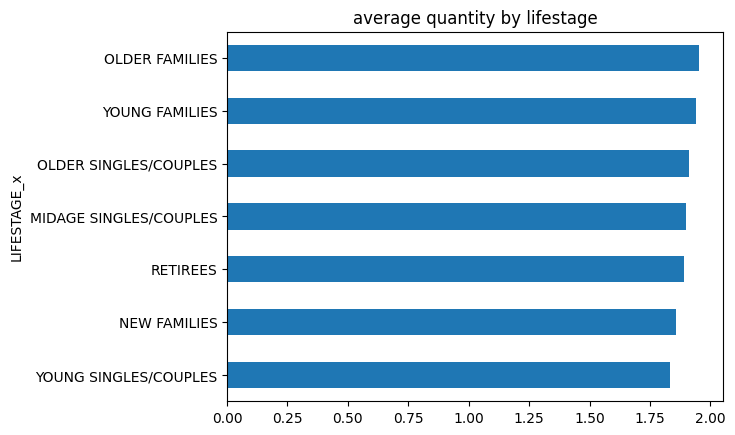

In [ ]:
#average quantity by lifestage
chips_ls_avg_qty=chips_ls['PROD_QTY'].mean()
chips_ls_avg_sales=chips_ls['TOT_SALES'].mean()
chips_ls_avg_qty.sort_values().plot(kind='barh')
plt.title('average quantity by lifestage')
plt.show()

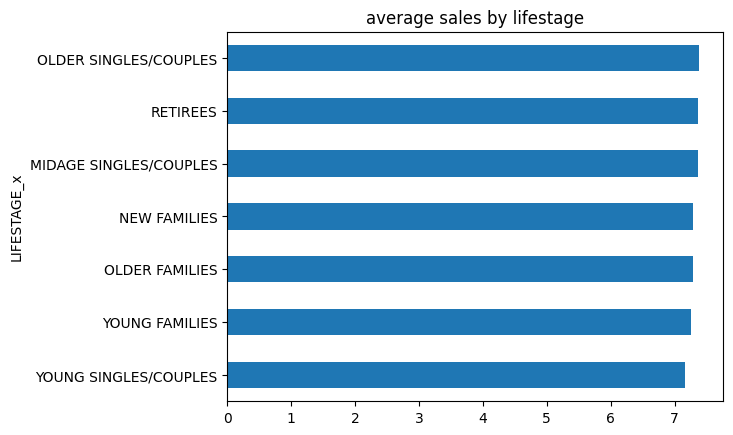

In [ ]:
chips_ls_avg_sales.sort_values().plot(kind='barh')
plt.title('average sales by lifestage')
plt.show()

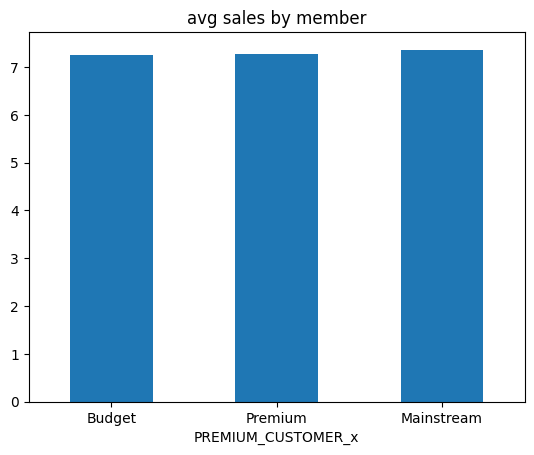

In [ ]:
#membership
chips_pt=chips.groupby('PREMIUM_CUSTOMER_x')
chips_pt_avg_qty=chips_pt['PROD_QTY'].mean()
chips_pt_avg_sales=chips_pt['TOT_SALES'].mean()
chips_pt_avg_sales.sort_values().plot(kind='bar')
plt.xticks(rotation=360)
plt.title('avg sales by member')
plt.show()

In [ ]:
chips_pt_avg_sales.round(3)

PREMIUM_CUSTOMER_x
Budget        7.259
Mainstream    7.361
Premium       7.282
Name: TOT_SALES, dtype: float64

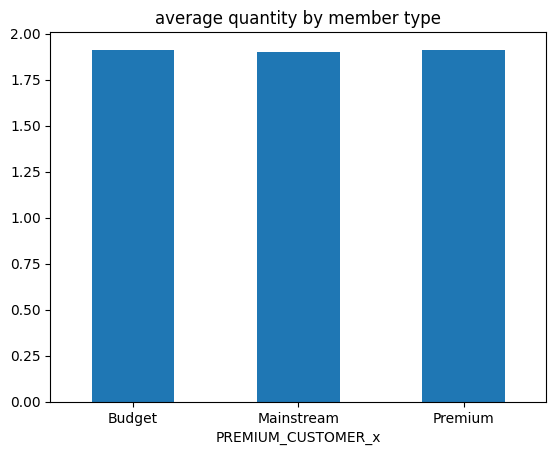

In [ ]:
chips_pt_avg_qty.sort_index().plot(kind='bar')
plt.xticks(rotation=360)
plt.title('average quantity by member type')
plt.show()

In [ ]:
chips_pt_avg_qty.round(3)

PREMIUM_CUSTOMER_x
Budget        1.910
Mainstream    1.902
Premium       1.912
Name: PROD_QTY, dtype: float64

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
chips_pt['BRAND'].value_counts()

PREMIUM_CUSTOMER_x  BRAND     
Budget              Kettle        14154
                    Smiths        11548
                    Doritos        9818
                    Pringles       8620
                    Red            6480
                    Thins          4931
                    Infuzions      4922
                    WW             3881
                    Cobs           3274
                    Tostitos       3236
                    Twisties       3229
                    Old            3203
                    Natural        2246
                    Tyrrells       2195
                    Grain          2114
                    CCs            1678
                    Cheezels       1626
                    Woolworths     1605
                    Cheetos        1051
                    Snbts           610
                    Burger          579
                    GrnWves         542
                    French          539
                    NCC             539
         

In [ ]:
customer_type_counts=chips['PREMIUM_CUSTOMER_x'].value_counts()
pivot_table=chips.pivot_table(index='PREMIUM_CUSTOMER_x',columns='BRAND',aggfunc='size',fill_value=0)
percentage_difference=(pivot_table/customer_type_counts[:,np.newaxis])*100
percentage_difference

<ipython-input-71-71a690a1bdd4>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentage_difference=(pivot_table/customer_type_counts[:,np.newaxis])*100


BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain,GrnWves,Infuzions,Kettle,NCC,Natural,Old,Pringles,Red,Smiths,Snbts,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW,Woolworths
PREMIUM_CUSTOMER_x,,,,,,,,,,,,,,,,,,,,,,,,,
Budget,0.567714,1.645292,1.030513,1.594305,3.210182,9.626623,0.528494,2.072793,0.531435,4.826058,13.878103,0.528494,2.202220,3.140566,8.451975,6.353689,11.322901,0.598110,0.525552,4.834883,3.172922,3.166059,2.152214,3.805350,1.573715
Mainstream,0.588261,1.750827,1.192623,1.862467,4.174718,12.014256,0.544248,2.700846,0.559277,5.957748,17.629568,0.531367,2.320838,3.998669,10.630555,6.936751,12.712010,0.583967,0.534587,5.835373,4.011551,4.063077,2.772768,3.849457,1.725063
Premium,0.627063,1.780743,1.097718,1.782178,3.630363,10.241068,0.533793,2.356149,0.581145,5.350839,15.369493,0.552447,2.354714,3.438083,9.440379,6.940738,12.100732,0.605539,0.571101,5.320706,3.584445,3.501220,2.387717,4.093844,1.757784


There is not much difference between lifestage and member, When it comes to average price and quantity purchased.

# Deeper insights

In [ ]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
import scipy.stats as stats
chips_ls.describe()

DATE                                              \
                          count          mean         std      min      25%   
LIFESTAGE_x                                                                   
MIDAGE SINGLES/COUPLES  25109.0  43464.125851  105.823780  43282.0  43372.0   
NEW FAMILIES             6919.0  43466.116202  105.514786  43282.0  43375.0   
OLDER FAMILIES          48596.0  43463.975842  105.048459  43282.0  43374.0   
OLDER SINGLES/COUPLES   54479.0  43463.347583  105.739590  43282.0  43372.0   
RETIREES                49763.0  43464.106726  105.027814  43282.0  43373.0   
YOUNG FAMILIES          43592.0  43464.414204  105.431715  43282.0  43373.0   
YOUNG SINGLES/COUPLES   36376.0  43464.139927  105.436989  43282.0  43373.0   

                                                  STORE_NBR              ...  \
                            50%      75%      max     count        mean  ...   
LIFESTAGE_x                                                              ...   
MIDAGE SINGLES/COUPLES  43465.0  43557.0  43646.0   25109.0  135.670118  ...   
NEW FAMILIES            43469.0  43557.0  43646.0    6919.0  133.769475  ...   
OLDER FAMILIES          43464.0  43554.0  43646.0   48596.0  134.168779  ...   
OLDER SINGLES/COUPLES   43462.0  43555.0  43646.0   54479.0  134.024542  ...   
RETIREES                43463.0  43555.0  43646.0   49763.0  136.159295  ...   
YOUNG FAMILIES          43465.0  43556.0  43646.0   43592.0  136.019476  ...   
YOUNG SINGLES/COUPLES   43463.0  43554.0  43646.0   36376.0  135.125825  ...   

                       PROD_QTY        TOT_SALES                           \
                            75%    max     count      mean       std  min   
LIFESTAGE_x                                                                 
MIDAGE SINGLES/COUPLES      2.0    5.0   25109.0  7.357720  2.532113  1.5   
NEW FAMILIES                2.0    5.0    6919.0  7.289124  2.557880  1.5   
OLDER FAMILIES              2.0  200.0   48596.0  7.279760  4.816231  1.5   
OLDER SINGLES/COUPLES       2.0    5.0   54479.0  7.386823  2.511223  1.5   
RETIREES                    2.0    5.0   49763.0  7.364325  2.529464  1.5   
YOUNG FAMILIES              2.0    5.0   43592.0  7.252709  2.486029  1.5   
YOUNG SINGLES/COUPLES       2.0    5.0   36376.0  7.158547  2.628146  1.5   

                                              
                        25%  50%  75%    max  
LIFESTAGE_x                                   
MIDAGE SINGLES/COUPLES  5.6  7.4  9.2   29.5  
NEW FAMILIES            5.4  7.4  9.2   27.0  
OLDER FAMILIES          5.4  7.4  8.8  650.0  
OLDER SINGLES/COUPLES   5.8  7.4  9.2   29.5  
RETIREES                5.6  7.4  9.2   29.5  
YOUNG FAMILIES          5.4  7.4  8.8   29.5  
YOUNG SINGLES/COUPLES   5.4  7.4  8.8   27.0  

[7 rows x 56 columns]

In [ ]:
#grouping by lifestage
chips_youngfam=chips[chips['LIFESTAGE_x']=='YOUNG FAMILIES']
chips_young=chips[chips['LIFESTAGE_x']=='YOUNG SINGLES/COUPLES']

In [ ]:
t_statistic,p_value=stats.ttest_ind(chips_youngfam['TOT_SALES'],chips_young['TOT_SALES'])
print('T STAT',t_statistic)
print('P VALUE',p_value)

T STAT 5.196463492534499
P VALUE 2.0361280135116597e-07


There is no difference between young families and young singles.

In [ ]:
chips_prem=chips[chips['PREMIUM_CUSTOMER_x']=='premium']
chips_bud=chips[chips['PREMIUM_CUSTOMER_x']=='budget']
t_statistic,p_value=stats.ttest_ind(chips_prem['TOT_SALES'],chips_bud['TOT_SALES'])
print('T STAT',t_statistic)
print('P VALUE',p_value)

T STAT nan
P VALUE nan


This is also rejected.

In [ ]:
chips['WEIGHT'].value_counts()

175g    66388
150g    43131
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
210g     6272
200g     4473
135g     3257
250g     3169
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
180g     1468
125g     1454
Name: WEIGHT, dtype: int64

In [ ]:
chips['WEIGHT']=chips['WEIGHT'].astype(str)

In [ ]:
weight_category_map={
    '70g':'Small',
    '90g':'Small',
    '110g':'Small',
    '125g':'Small',
    '134g':'Small',
    '135g':'Small',
    '150g':'Small',
    '160g':'Small',
    '165g':'Small',
    '170g':'Small',
    '175g':'Small',
    '180g':'Small',
    '190g':'Small',
    '200g':'Medium',
    '210g':'Medium',
    '220g':'Medium',
    '250g':'Medium',
    '270g':'Medium',
    '300g':'Large',
    '330g':'Large',
    '380g':'Large',
    'nan':np.nan
}
chips['BAG_SIZE']=chips['WEIGHT'].map(weight_category_map)

In [ ]:
chips['BAG_SIZE'].value_counts()

Small     204432
Large      34124
Medium     21763
Name: BAG_SIZE, dtype: int64

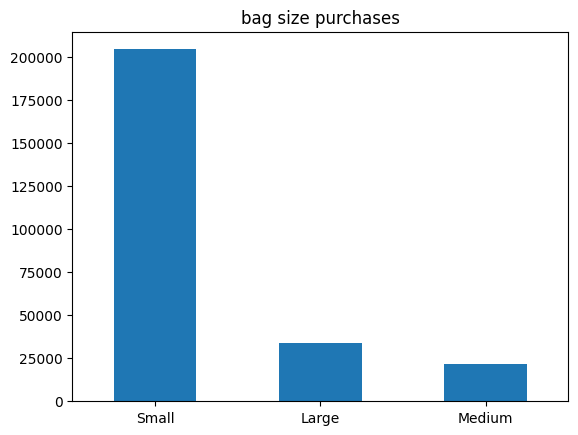

In [ ]:
chips_bs=chips['BAG_SIZE'].value_counts()
chips_bs.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('bag size purchases')
plt.show()

In [ ]:
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,LIFESTAGE_x,PREMIUM_CUSTOMER_x,LIFESTAGE_y,PREMIUM_CUSTOMER_y,BAG_SIZE
0,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget,MIDAGE SINGLES/COUPLES,Budget,Small
1,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget,MIDAGE SINGLES/COUPLES,Budget,Small
2,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget,MIDAGE SINGLES/COUPLES,Budget,Small
3,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300g,Old,MIDAGE SINGLES/COUPLES,Budget,MIDAGE SINGLES/COUPLES,Budget,Large
4,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330g,Smiths,MIDAGE SINGLES/COUPLES,Budget,MIDAGE SINGLES/COUPLES,Budget,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium,Small
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium,Small
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium,Small
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES,Premium,Small


# Checking data formats

In [ ]:
#checking data types for transaction data
chips.dtypes

DATE                    int64
STORE_NBR               int64
LYLTY_CARD_NBR          int64
TXN_ID                  int64
PROD_NBR                int64
PROD_NAME              object
PROD_QTY                int64
TOT_SALES             float64
WEIGHT                 object
BRAND                  object
LIFESTAGE_x            object
PREMIUM_CUSTOMER_x     object
LIFESTAGE_y            object
PREMIUM_CUSTOMER_y     object
BAG_SIZE               object
dtype: object

In [ ]:
#checking data types for purchase behaviour
chips_beh.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

Here there is no change in data formats, as every thing is clear.

In [ ]:
chips.to_csv('chips.csv')

# Conclusion:


*   Largest coustomer type is the mainstream group.
*   Largest membership group is the older population.
*   Top 10 members spent over 120 dollars on chips within a year.
*   Top 4 brands sold are: Doritos, Smiths, Pringles and Kettle.
*   Older individuals purchased the most chips includes single individuals and families.
*   New families purchased the least on chips.
*   There doesn't appear to be any statistical difference with purchase prices with customer in either life stage or membership type.
*   The most purchased sized chips were the small bags and then large bags and medium sized bags were sold the least.







